In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from matplotlib import pyplot
import seaborn as sns

import itertools

from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('data/feature_df.csv')
y = np.array(df["#label"])
X = df.drop(["#id", "#label"],  axis='columns')

In [13]:
column_names = list(df.columns.values)
column_names

['#label',
 '#id',
 'average_sentence_length_in_token',
 'average_characters_per_word',
 'average_syllables_per_word',
 'text_length_in_token',
 'average_number_of_noun_phrases_per_sentence',
 'average_heights',
 'average_number_of_subordinate_clauses_per_sentence',
 'average_count_of_sentences_with_verb_as_root',
 'average_count_of_sentences_with_nouns_as_root',
 'POS_tag_proportion_for_verbs',
 'POS_tag_proportion_for_aux_verbs',
 'POS_tag_proportion_for_nouns',
 'POS_tag_proportion_for_adjectives',
 'POS_tag_proportion_for_punctuations',
 'POS_tag_proportion_for_determiners',
 'POS_tag_proportion_for_pronouns',
 'POS_tag_proportion_for_conjunctions',
 'POS_tag_proportion_for_numerales',
 'POS_tag_proportion_for_adpositions',
 'ttr',
 'lexical_complexity_score',
 'average_number_of_verbs_in_sentence',
 'average_count_of_pronouns_per_sentence',
 'average_count_of_definite_articles_per_sentence',
 'average_semantic_similarity_of_all_nouns',
 'average_semantic_similarity_of_all_verbs',


array([[<AxesSubplot:title={'center':'#label'}>,
        <AxesSubplot:title={'center':'average_sentence_length_in_token'}>,
        <AxesSubplot:title={'center':'average_characters_per_word'}>,
        <AxesSubplot:title={'center':'average_syllables_per_word'}>,
        <AxesSubplot:title={'center':'text_length_in_token'}>],
       [<AxesSubplot:title={'center':'average_number_of_noun_phrases_per_sentence'}>,
        <AxesSubplot:title={'center':'average_heights'}>,
        <AxesSubplot:title={'center':'average_number_of_subordinate_clauses_per_sentence'}>,
        <AxesSubplot:title={'center':'average_count_of_sentences_with_verb_as_root'}>,
        <AxesSubplot:title={'center':'average_count_of_sentences_with_nouns_as_root'}>],
       [<AxesSubplot:title={'center':'POS_tag_proportion_for_verbs'}>,
        <AxesSubplot:title={'center':'POS_tag_proportion_for_aux_verbs'}>,
        <AxesSubplot:title={'center':'POS_tag_proportion_for_nouns'}>,
        <AxesSubplot:title={'center':'POS_t

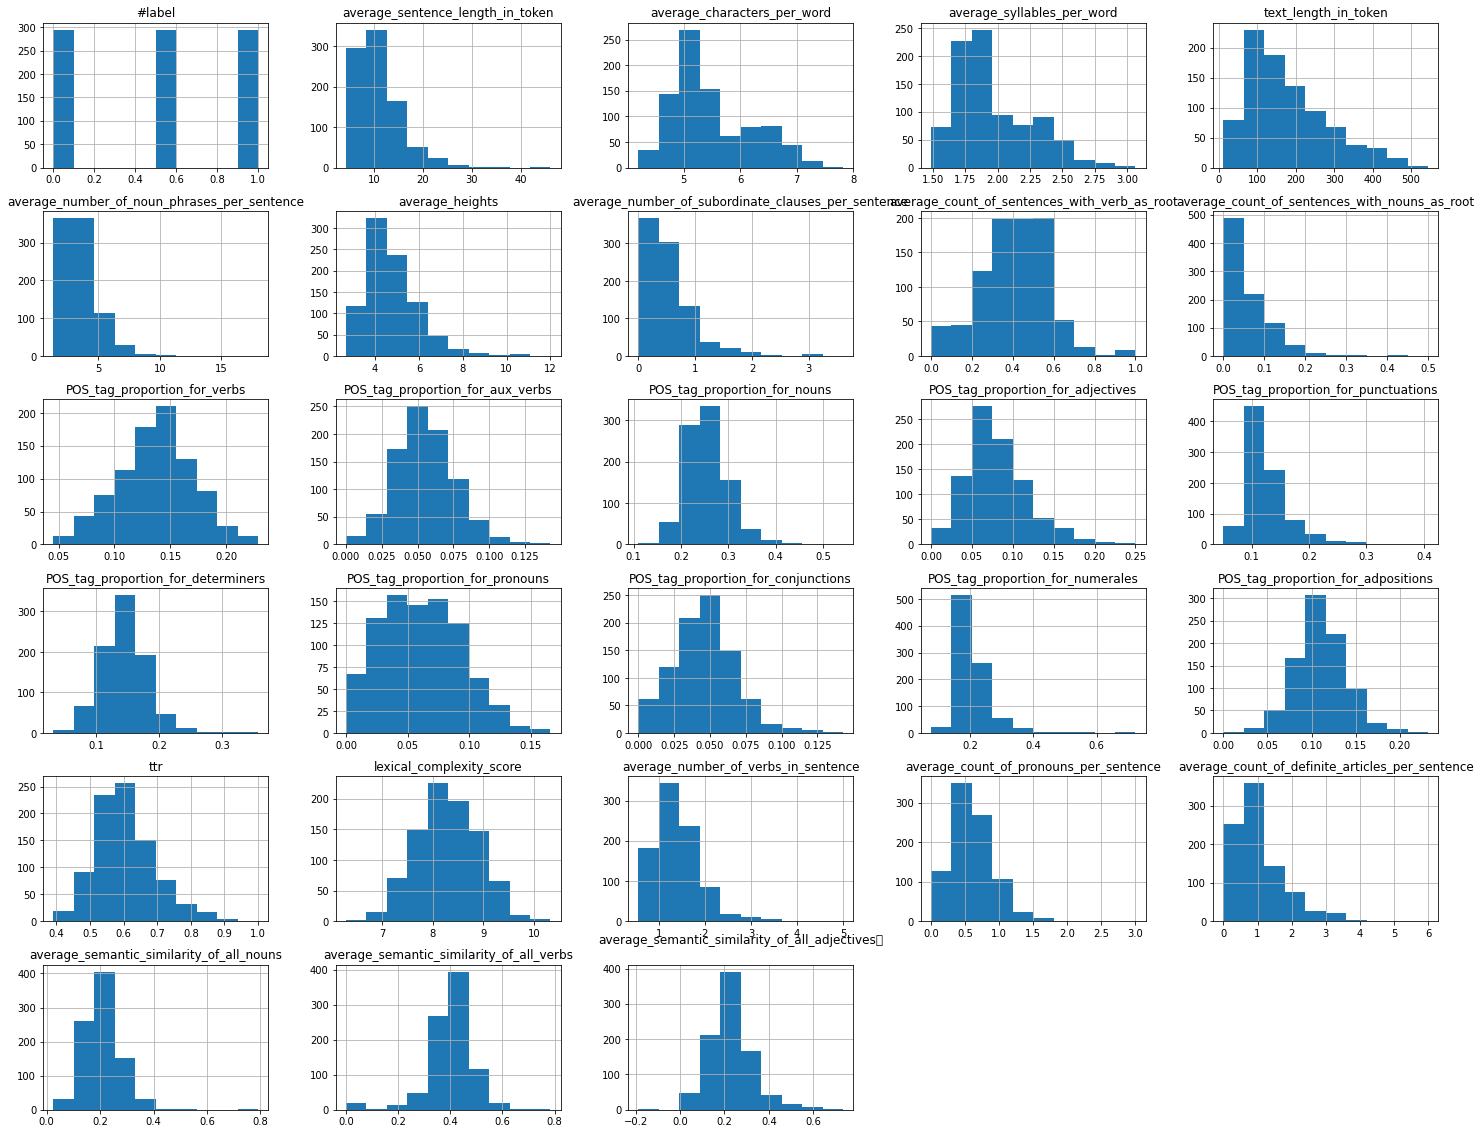

In [7]:
df.hist(figsize=(25,20))

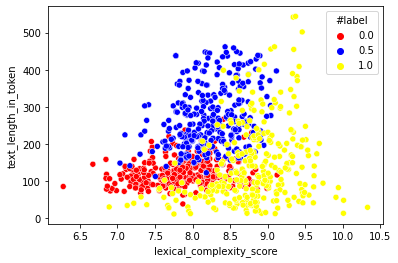

In [12]:
a = sns.scatterplot(data=df, hue="#label", x="lexical_complexity_score", y="text_length_in_token", palette=["red", "blue", "yellow"])

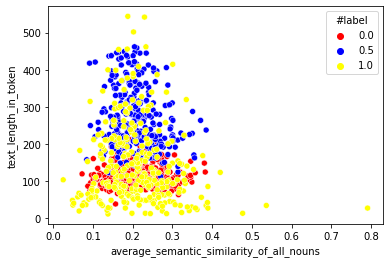

In [14]:
b = sns.scatterplot(data=df, hue="#label", x="average_semantic_similarity_of_all_nouns", y="text_length_in_token", palette=["red", "blue", "yellow"])

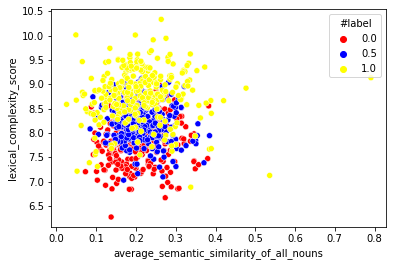

In [16]:
c = sns.scatterplot(data=df, hue="#label", x="average_semantic_similarity_of_all_nouns", y="lexical_complexity_score", palette=["red", "blue", "yellow"])

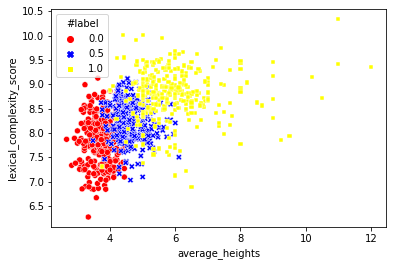

In [36]:
d = sns.scatterplot(data=df, hue="#label", x="average_heights", y="lexical_complexity_score",  
                    palette=["red", "blue", "yellow"], 
                    style="#label")
# markers = {"Lunch": "s", "Dinner": "X"}

In [41]:
y

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [53]:
map_lab = {1.0: 3, 0.5:2, 0.0:1}
y_int = np.array([map_lab[x] for x in y])
data = df.drop(["#id","#label"],  axis='columns')

<AxesSubplot:title={'center':'Feature Importances'}>

c:\users\daniela weiß\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\daniela weiß\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


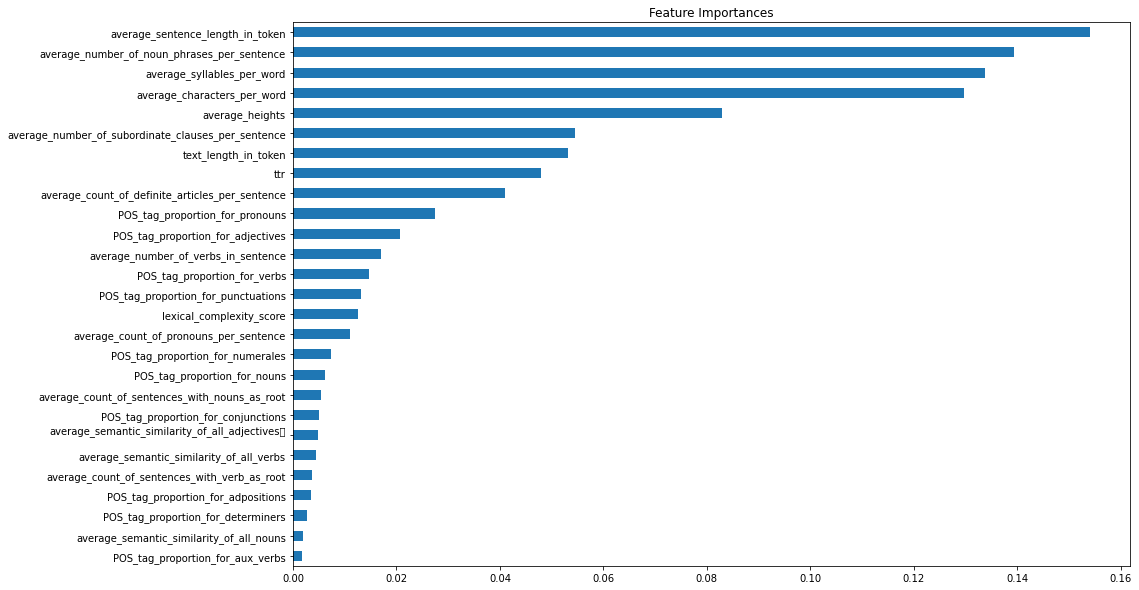

In [56]:
model = RandomForestClassifier()
model.fit(X, y_int)

importances = model.feature_importances_
features = data.columns

feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values()
    
plt.figure(figsize=(15, 10)) 
plt.title('Feature Importances')
feat_importances.plot(kind='barh')